# **STRYKER HACKATHON**
### Problem Statement 03 - Surgical Tool Segmentation

> Ojas Patil (21BAI1106)

> Garvita Kesarwani (21BCE1086)


## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cloning the Detectron2 Repo

In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-5yhfaxgv
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-5yhfaxgv
  Resolved https://github.com/facebookresearch/detectron2.git to commit b7c7f4ba82192ff06f2bbb162b9f67b00ea55867
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6147746 sha256=02e708966920d7a27c0291c030444

## Importing the required libraries

In [ ]:
# # COMMON LIBRARIES
import os
import cv2
import torch
import detectron2
# from datetime import datetime
from google.colab.patches import cv2_imshow

# # DATA SET PREPARATION AND LOADING
# from detectron2.data.datasets import register_coco_instances
# from detectron2.data import DatasetCatalog, MetadataCatalog

# # VISUALIZATION
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode
import sys, distutils.core

# # CONFIGURATION
# from detectron2 import model_zoo
from detectron2.config import get_cfg

# # EVALUATION
from detectron2.engine import DefaultPredictor

# # TRAINING
# from detectron2.engine import DefaultTrainer

### Importing our Detectron2 Model

In [ ]:
cfg = get_cfg()
cfg.merge_from_file("/content/drive/MyDrive/ColabNotebooks/models/Detectron2_Good_model/config.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/ColabNotebooks/models/Detectron2_Good_model/model_final.pth"
predictor = DefaultPredictor(cfg)


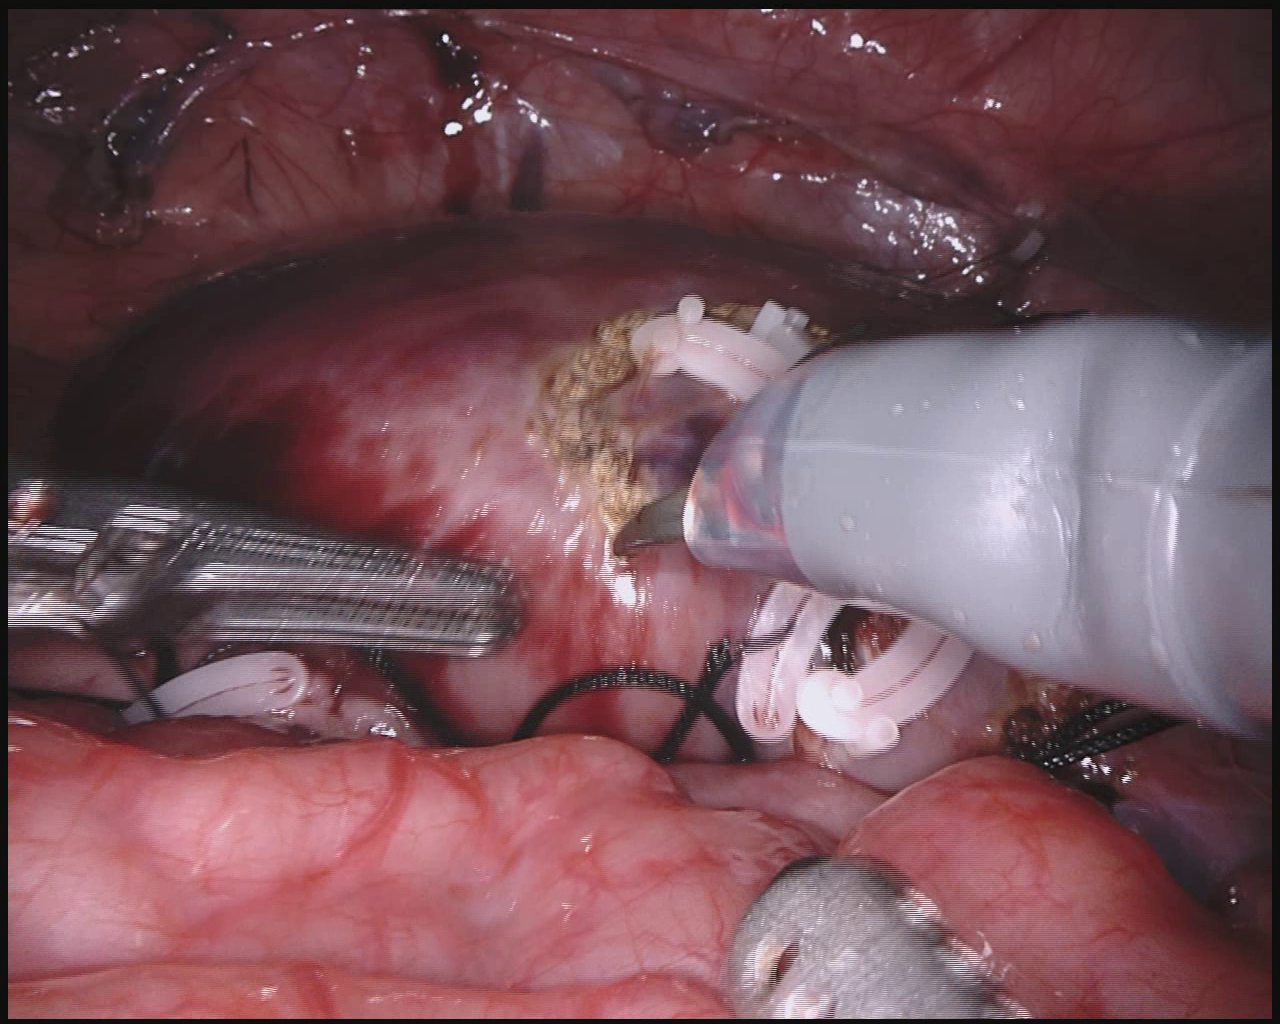

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Strykathon/Surgical_Tools/test/s1_frame080.png")
cv2_imshow(image)

In [ ]:
from detectron2.data.datasets import register_coco_instances

register_coco_instances("my_dataset_val", {}, "/content/drive/MyDrive/Strykathon/Surgical_Tools/test/test_json.json", "/content/drive/MyDrive/Strykathon/Surgical_Tools/test")

In [ ]:
from detectron2.data import MetadataCatalog, DatasetCatalog

val_metadata = MetadataCatalog.get("my_dataset_val")
val_dataset_dicts = DatasetCatalog.get("my_dataset_val")

## Prediction on a Validation Image

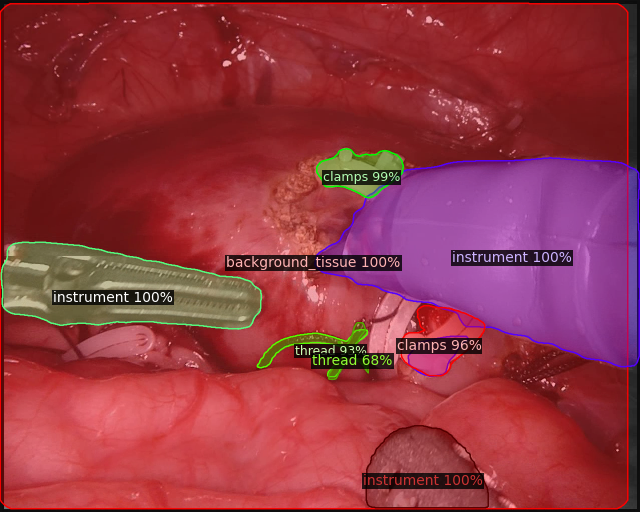

In [ ]:
outputs = predictor(image)

v = Visualizer(image[:, :, ::-1],
                metadata=val_metadata,  # Assuming you have the metadata
                scale=0.5,
                instance_mode=ColorMode.IMAGE_BW)

# Draw predictions on the image
outputs["instances"].remove("pred_boxes")
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Display the resulting image
cv2_imshow(out.get_image()[:, :, ::-1])

## Predicting on the Final Test Data

In [ ]:
# Directory path to the input images folder
input_images_directory = "/content/drive/MyDrive/Strykathon/Surgical_Tools/Test_Data/seq_1/frames"

# Output directory where the segmented images will be saved
output_directory = "/content/drive/MyDrive/Strykathon/Surgical_Tools/Test_Results/seq_1"  # Replace this with the path to your desired output directory

# Loop over the images in the input folder
for image_filename in os.listdir(input_images_directory):
    image_path = os.path.join(input_images_directory, image_filename)
    new_im = cv2.imread(image_path)

    # Perform prediction on the new image
    outputs = predictor(new_im)  # Format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format

    # We can use `Visualizer` to draw the predictions on the image.
    v = Visualizer(new_im[:, :, ::-1], metadata=val_metadata)
    outputs["instances"].remove("pred_boxes")
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    # cv2_imshow(out.get_image()[:, :, ::-1])

    # Create the output filename with _result extension
    result_filename = os.path.splitext(image_filename)[0] + ".png"
    output_path = os.path.join(output_directory, result_filename)
    # print(output_path)

    # Save the segmented image
    cv2.imwrite(output_path, out.get_image()[:, :, ::-1])

print("Segmentation of all images completed.")

Segmentation of all images completed.


In [ ]:
# Directory path to the input images folder
input_images_directory = "/content/drive/MyDrive/Strykathon/Surgical_Tools/Test_Data/seq_2/seq_2/frames"

# Output directory where the segmented images will be saved
output_directory = "/content/drive/MyDrive/Strykathon/Surgical_Tools/Test_Results/seq_2"  # Replace this with the path to your desired output directory

# Loop over the images in the input folder
for image_filename in os.listdir(input_images_directory):
    image_path = os.path.join(input_images_directory, image_filename)
    new_im = cv2.imread(image_path)

    # Perform prediction on the new image
    outputs = predictor(new_im)  # Format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format

    # We can use `Visualizer` to draw the predictions on the image.
    v = Visualizer(new_im[:, :, ::-1], metadata=val_metadata)
    outputs["instances"].remove("pred_boxes")
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    # cv2_imshow(out.get_image()[:, :, ::-1])

    # Create the output filename with _result extension
    result_filename = os.path.splitext(image_filename)[0] + ".png"
    output_path = os.path.join(output_directory, result_filename)
    # print(output_path)

    # Save the segmented image
    cv2.imwrite(output_path, out.get_image()[:, :, ::-1])

print("Segmentation of all images completed.")

Segmentation of all images completed.


In [ ]:
# Directory path to the input images folder
input_images_directory = "/content/drive/MyDrive/Strykathon/Surgical_Tools/Test_Data/seq_3/frames"

# Output directory where the segmented images will be saved
output_directory = "/content/drive/MyDrive/Strykathon/Surgical_Tools/Test_Results/seq_3"  # Replace this with the path to your desired output directory

# Loop over the images in the input folder
for image_filename in os.listdir(input_images_directory):
    image_path = os.path.join(input_images_directory, image_filename)
    new_im = cv2.imread(image_path)

    # Perform prediction on the new image
    outputs = predictor(new_im)  # Format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format

    # We can use `Visualizer` to draw the predictions on the image.
    v = Visualizer(new_im[:, :, ::-1], metadata=val_metadata)
    outputs["instances"].remove("pred_boxes")
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    # cv2_imshow(out.get_image()[:, :, ::-1])

    # Create the output filename with _result extension
    result_filename = os.path.splitext(image_filename)[0] + ".png"
    output_path = os.path.join(output_directory, result_filename)
    # print(output_path)

    # Save the segmented image
    cv2.imwrite(output_path, out.get_image()[:, :, ::-1])

print("Segmentation of all images completed.")

Segmentation of all images completed.


In [ ]:
# Directory path to the input images folder
input_images_directory = "/content/drive/MyDrive/Strykathon/Surgical_Tools/Test_Data/seq_4/frames"

# Output directory where the segmented images will be saved
output_directory = "/content/drive/MyDrive/Strykathon/Surgical_Tools/Test_Results/seq_4"  # Replace this with the path to your desired output directory

# Loop over the images in the input folder
for image_filename in os.listdir(input_images_directory):
    image_path = os.path.join(input_images_directory, image_filename)
    new_im = cv2.imread(image_path)

    # Perform prediction on the new image
    outputs = predictor(new_im)  # Format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format

    # We can use `Visualizer` to draw the predictions on the image.
    v = Visualizer(new_im[:, :, ::-1], metadata=val_metadata)
    outputs["instances"].remove("pred_boxes")
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    # cv2_imshow(out.get_image()[:, :, ::-1])

    # Create the output filename with _result extension
    result_filename = os.path.splitext(image_filename)[0] + ".png"
    output_path = os.path.join(output_directory, result_filename)
    # print(output_path)

    # Save the segmented image
    cv2.imwrite(output_path, out.get_image()[:, :, ::-1])

print("Segmentation of all images completed.")

Segmentation of all images completed.


## Extracting Validation data into csv for LLM inference

In [ ]:
import csv
from skimage.measure import regionprops, label


# Assuming you have already defined the 'predictor' object and loaded the model.
# Also, make sure 'metadata' is defined appropriately.

# Directory path to the input images folder
input_images_directory = "/content/drive/MyDrive/Strykathon/Surgical_Tools/test"

# Output directory where the CSV file will be saved
# output_csv_path = "/content/drive/MyDrive/ColabNotebooks/data/3D-EM-Platelet/test_results/output_objects.csv"  # Replace this with the path to your desired output CSV file
output_csv_path = "/content/drive/MyDrive/Strykathon/Surgical_Tools/test_csv/result.csv"  # Replace this with the path to your desired output CSV file

# Open the CSV file for writing
with open(output_csv_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)

    # Write the header row in the CSV file
    csvwriter.writerow(["File Name", "Class Name", "Object Number", "Area", "Centroid", "BoundingBox"])  # Add more columns as needed for other properties

    # Loop over the images in the input folder
    for image_filename in os.listdir(input_images_directory):
        image_path = os.path.join(input_images_directory, image_filename)
        new_im = cv2.imread(image_path)

        # Perform prediction on the new image
        outputs = predictor(new_im)  # Format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format

        # Convert the predicted mask to a binary mask
        mask = outputs["instances"].pred_masks.to("cpu").numpy().astype(bool)

        # Get the predicted class labels
        class_labels = outputs["instances"].pred_classes.to("cpu").numpy()

        # Debugging: print class_labels and metadata.thing_classes
        #print("Class Labels:", class_labels)
        #print("Thing Classes:", train_metadata.thing_classes)

        # Use skimage.measure.regionprops to calculate object parameters
        labeled_mask = label(mask)
        props = regionprops(labeled_mask)

        # Write the object-level information to the CSV file
        for i, prop in enumerate(props):
            object_number = i + 1  # Object number starts from 1
            area = prop.area
            centroid = prop.centroid
            bounding_box = prop.bbox

            # Check if the corresponding class label exists
            if i < len(class_labels):
                class_label = class_labels[i]
                class_name = val_metadata.thing_classes[class_label]
            else:
                # If class label is not available (should not happen), use 'Unknown' as class name
                class_name = 'Unknown'

            # Write the object-level information to the CSV file
            csvwriter.writerow([image_filename, class_name, object_number, area, centroid, bounding_box])  # Add more columns as needed for other properties

print("Object-level information saved to CSV file.")

Object-level information saved to CSV file.
